             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


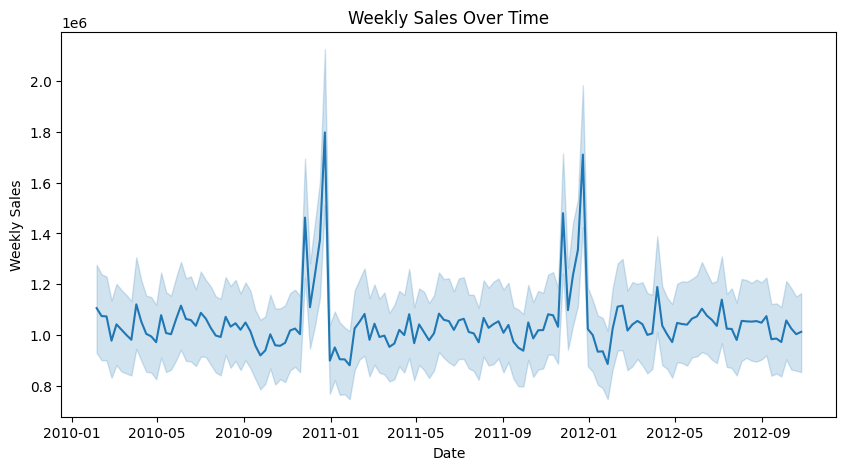

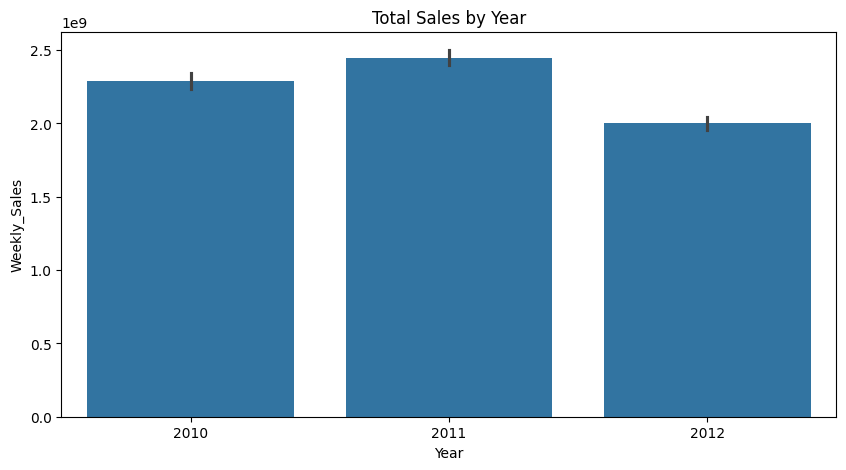

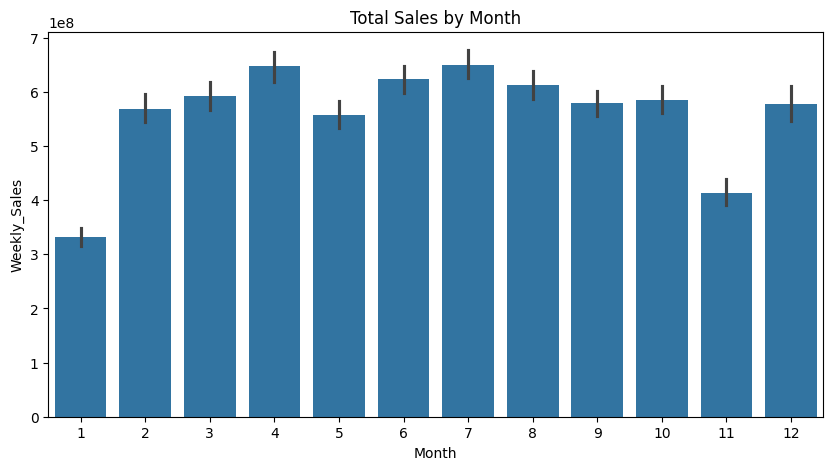


--- Average Sales on Holidays vs Non-Holidays ---
Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64
MAE: 432293.5877390658
RMSE: 521321.8139043533
R² Score: 0.15637875886838493
Model Performance:
MAE  : 432293.59
MSE  : 271776433652.53
RMSE : 521321.81
R²   : 0.16

Feature Importance (Linear Regression Coefficients):
        Feature   Coefficient
1  Holiday_Flag  44753.749389
3    Fuel_Price  36820.422033
7         Month  14572.113241
2   Temperature  -1584.687686
4           CPI  -2137.329552
0         Store -15114.593977
6          Year -22091.240188
5  Unemployment -23690.767739


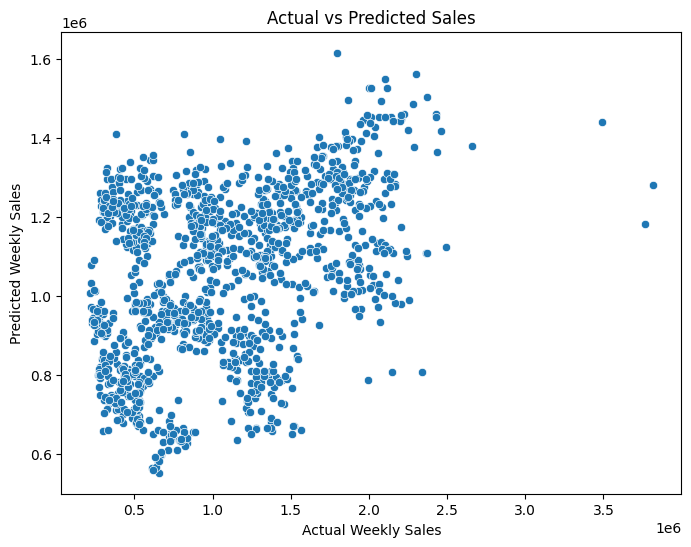

In [1]:
import os
import sys
import math
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import TimeSeriesSplit, train_test_split, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
import pandas as pd

df = pd.read_csv(r"C:\Users\M Thulasiram\Downloads\Walmart.csv")
print(df.describe())
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Data Info ---")
print(df.info())
print("\n--- Summary Statistics ---")
print(df.describe())
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Data Types ---")
print(df.dtypes)
# Convert 'Date' to datetime with correct format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract year & month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# Total Sales
total_sales = df['Weekly_Sales'].sum()
print(f"\nTotal Sales: {total_sales:,.2f}")
# Sales by Year
sales_by_year = df.groupby('Year')['Weekly_Sales'].sum()
print("\n--- Sales by Year ---")
print(sales_by_year)
# Sales by Store
sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("\n--- Top 5 Stores by Sales ---")
print(sales_by_store.head())
#visualization
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x='Year', y='Weekly_Sales', data=df, estimator=sum)
plt.title("Total Sales by Year")
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='Weekly_Sales', data=df, estimator=sum)
plt.title("Total Sales by Month")
plt.show()
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print("\n--- Average Sales on Holidays vs Non-Holidays ---")
print(holiday_sales)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# Extract year & month as separate features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# Drop original Date column
df.drop('Date', axis=1, inplace=True)
# Features (X) and target (y)
X = df.drop("Weekly_Sales", axis=1)  # Drop the target
y = df["Weekly_Sales"]               # Target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
joblib.dump(model, "walmart_sales_model.pkl")
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Linear Regression Coefficients):")
print(coef_df)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Sales")
plt.show()